In [1]:
from operator import add
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.stats import LombScargle
from gatspy.periodic import LombScargleFast
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from sqlite3 import *
import random

In [2]:
#conn = connect('minion_1016_sqlite.db')
conn = connect('astro_lsst_01_1004_sqlite.db')

In [3]:
def findObservations(fields): #fields are array in the format [(630,), (631,)] etc
    global allobs, uobs, gobs, robs, iobs, zobs, yobs
    x2 = fields # field containing gx 339-4
    L = [0]*len(x2)
    z = 0
    c = conn.cursor()
    #t = [('357',),('356',)]
    for z in range(0,len(x2)):
        i = x2[z]    
        #c.execute('SELECT expMJD, Field_fieldID, filter FROM ObsHistory WHERE Field_fieldID = ?',i)
        #k = c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE Field_fieldID = ?', i)
        allobs = c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "u" AND Field_fieldID = ?', i)
        uobs= c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "g" AND Field_fieldID = ?', i)
        gobs = c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "r" AND Field_fieldID = ?', i)
        robs = c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "i" AND Field_fieldID = ?', i)
        iobs = c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "z" AND Field_fieldID = ?', i)
        zobs = c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "y" AND Field_fieldID = ?', i)
        yobs = c.fetchall()

In [15]:
def addsecondExposure():
    global obs, allobs2, uobs2, gobs2, robs2, iobs2, zobs2, yobs2
    obs = [allobs, uobs, gobs, robs, iobs, zobs, yobs]
    for x in range(0, len(obs)):
        for y in range(0, len(obs[x])):
            obs[x][y] = np.mean(obs[x][y])
    allobs2=[]
    uobs2=[]
    gobs2=[]
    robs2=[]
    iobs2=[]
    zobs2=[]
    yobs2=[]
    obs2 = [allobs2, uobs2, gobs2, robs2, iobs2, zobs2, yobs2]
    for x in range(0, len(obs)):
        obs2[x] = [t + (17./(3600*24)) for t in obs[x]]

    for x in range(0, len(obs)):
        obs[x].extend(obs2[x])

    # creates observation 17 seconds after first

In [16]:
def averageFlux(observations, startdate, Frequency):
    b = [0]*len(observations)
    for seconds in range(0, 15):
        a = [np.sin((2*np.pi*(Frequency*0.01))*(x-startdate+(seconds*(3600*24)))) for x in observations] # optical modulation
        b = map(add, a, b)
    c = [z/15 for z in b]
    d = [z + z*random.gauss(0, 0.1) for z in c]
    return d

In [17]:
findObservations([(630,)])
addsecondExposure()
averageFlux(obs[0], obs[0][0], 1)

[1.4584832323910871e-12,
 0.00068320043703539823,
 0.48766577126685717,
 0.55468798465686553,
 0.62035878481483264,
 0.55904680624769099,
 0.70386424734256237,
 0.60787390500646976,
 0.69548815452226864,
 0.66700198462739402,
 0.80334597022487508,
 0.6962330628063077,
 0.97779141460214158,
 0.84742393307038766,
 0.96764206135760089,
 0.77852553733006125,
 0.8787369753889025,
 0.75332364983701505,
 0.90611435518385863,
 0.8511548352086431,
 1.0081836643521676,
 1.2776176825146484,
 1.0985891768354299,
 0.82489109175372699,
 0.80770874059530484,
 0.36966715562965186,
 0.074501265003435749,
 0.077714017075293088,
 0.074674611473681513,
 0.064633760119460038,
 0.048036199380849423,
 0.0654637931177907,
 0.072489574175923985,
 0.055786839446753028,
 -0.61156070602492485,
 -0.54956767782290583,
 -0.96941549985228059,
 -0.94000508840349517,
 -0.75914041135465604,
 0.034201643019978072,
 0.04229632292424864,
 0.032098845542415835,
 0.030181852637932001,
 0.46244488668155415,
 0.502782663927423

[ 9.99882934] d
10


[ 15.11941863] d
10


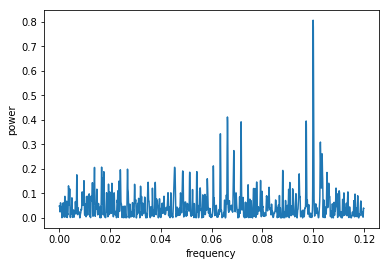

[ 10.00240628] d
10


[ 10.00187954] d
10


[ 9.99968266] d
10


[ 9.99882934] d
10


[ 9.99933678] d
10


[ 9.08864914] d
11


[ 13.13205703] d
11


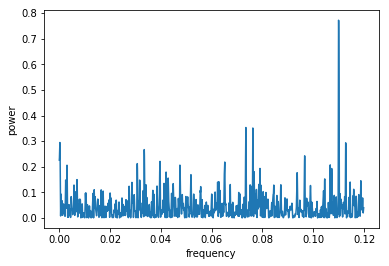

[ 9.09285484] d
11


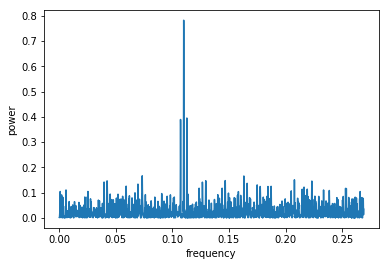

[ 9.09189632] d
11


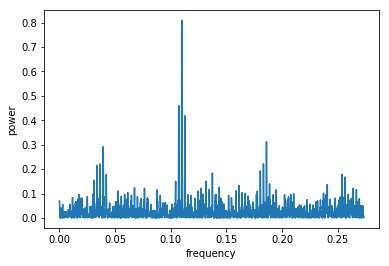

[ 9.09134921] d
11


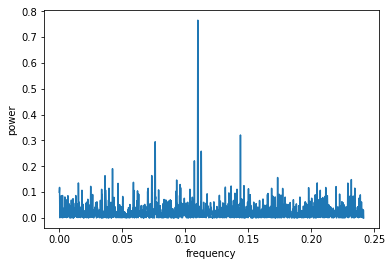

[ 9.08864914] d
11


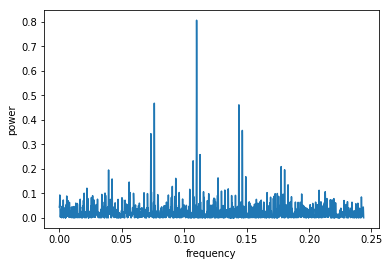

[ 9.09151273] d
11


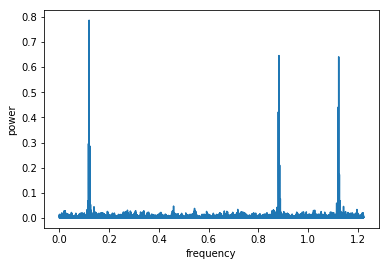

[ 8.334368] d
12


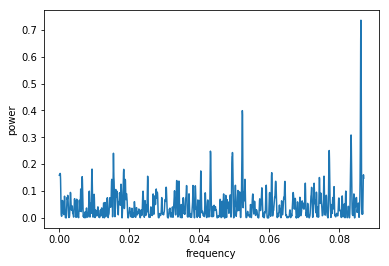

[ 11.60645458] d
12


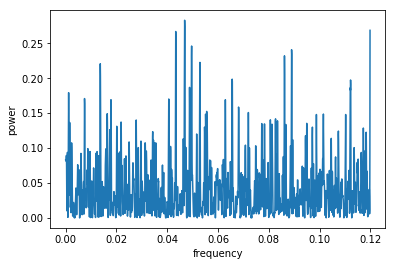

[ 21.33389087] d
12


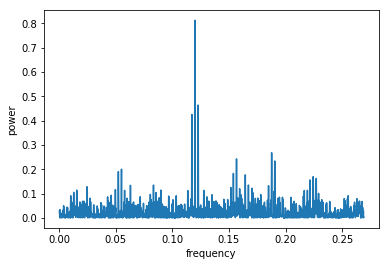

[ 8.33368727] d
12


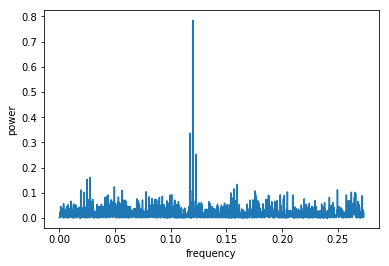

[ 8.33429343] d
12


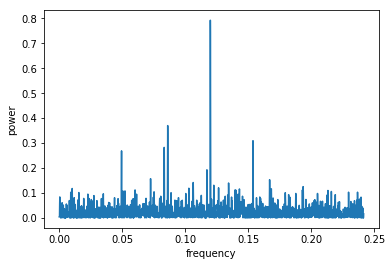

[ 8.334368] d
12


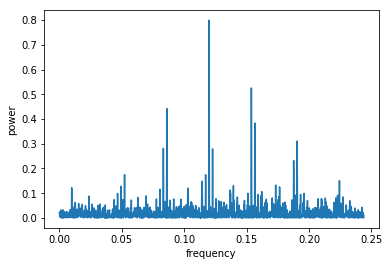

[ 8.33480858] d
12


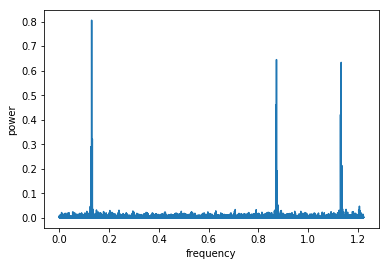

[ 7.6922635] d
13


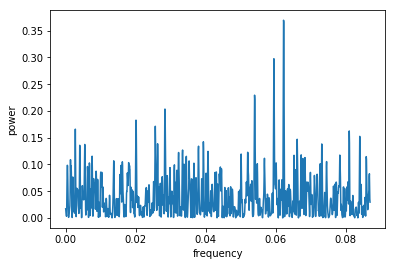

[ 16.06574719] d
13


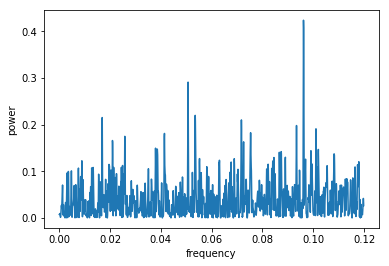

[ 10.39775831] d
13


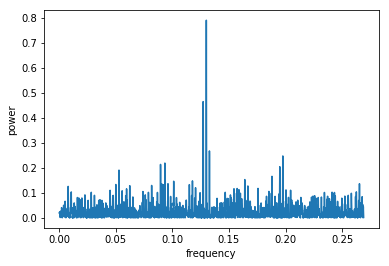

[ 7.69220407] d
13


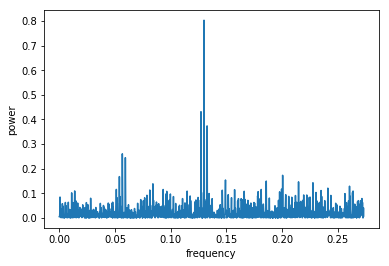

[ 7.69362878] d
13


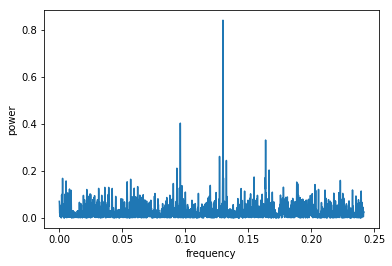

[ 7.6922635] d
13


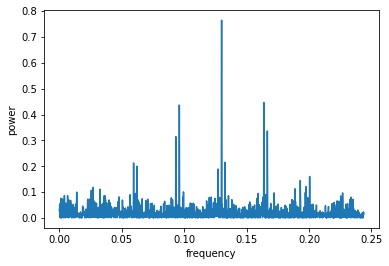

[ 7.69093386] d
13


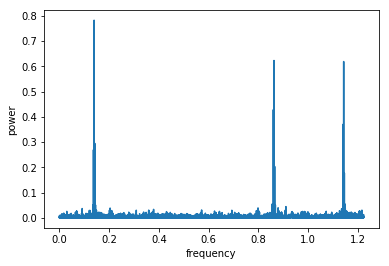

[ 7.14202096] d
14


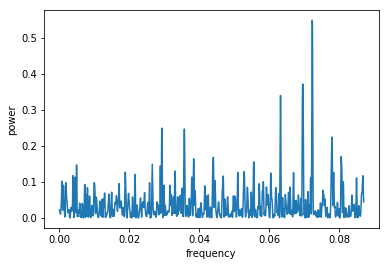

[ 13.84013145] d
14


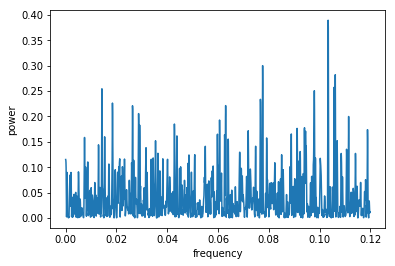

[ 9.67418022] d
14


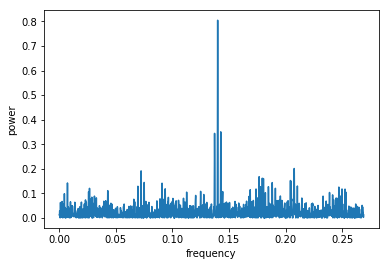

[ 7.14241845] d
14


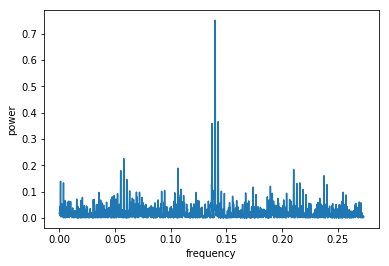

[ 7.14443] d
14


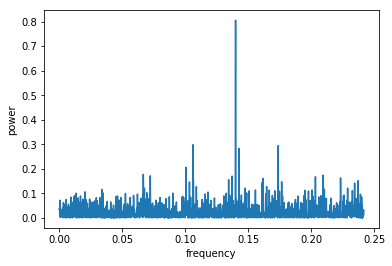

[ 7.14202096] d
14


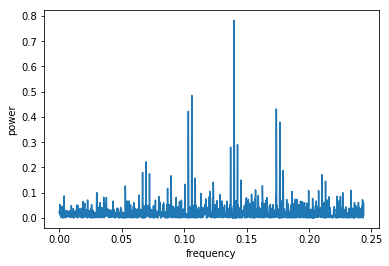

[ 7.14238341] d
14


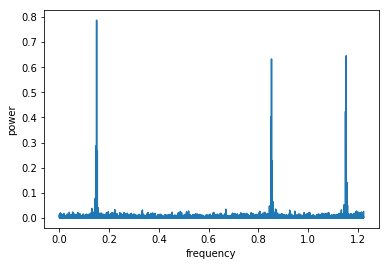

[ 6.66781613] d
15


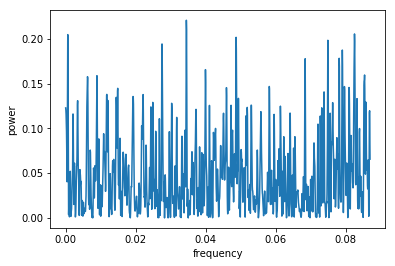

[ 28.99092695] d
15


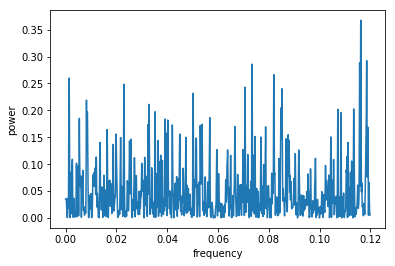

[ 8.60332756] d
15


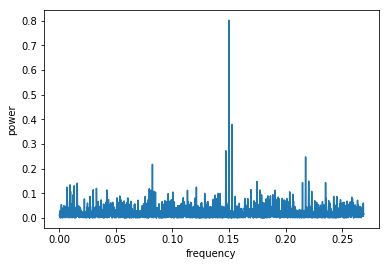

[ 6.66598022] d
15


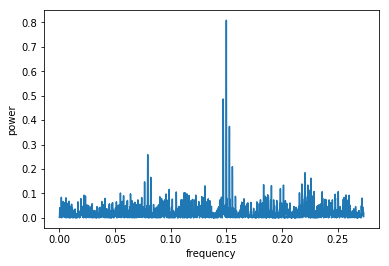

[ 6.66580217] d
15


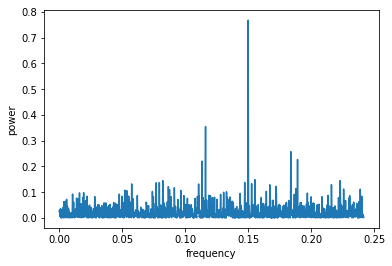

[ 6.66524318] d
15


[ 6.66687336] d
15


[ 6.25039902] d
16


[ 17.1208604] d
16


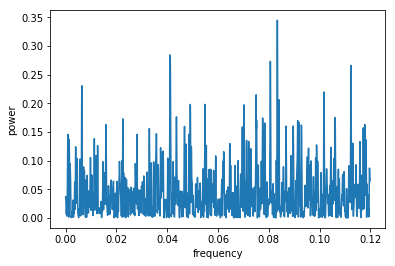

[ 11.99516909] d
16


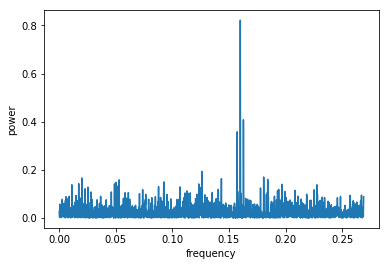

[ 6.24912925] d
16


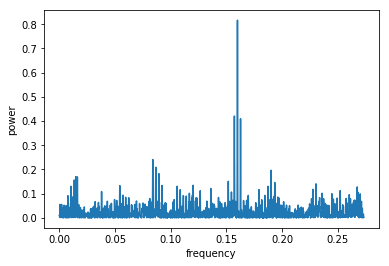

[ 6.2495721] d
16


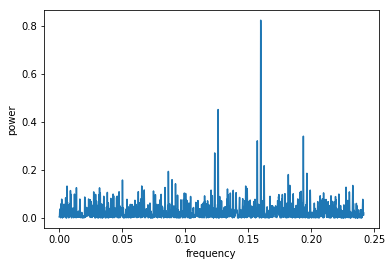

[ 6.25039902] d
16


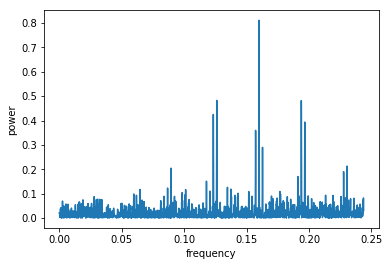

[ 6.25072613] d
16


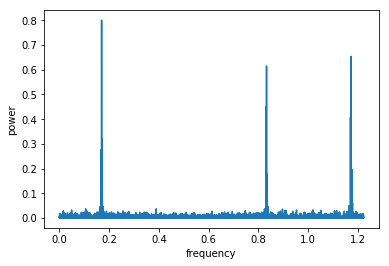

[ 5.88216506] d
17


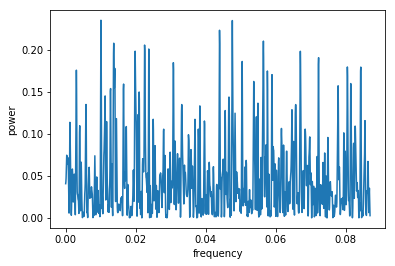

[ 99.01648938] d
17


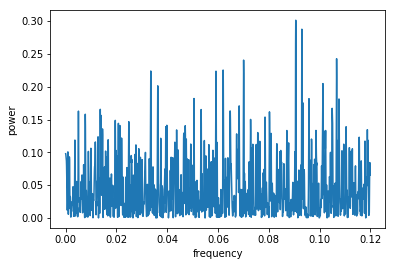

[ 11.03524591] d
17


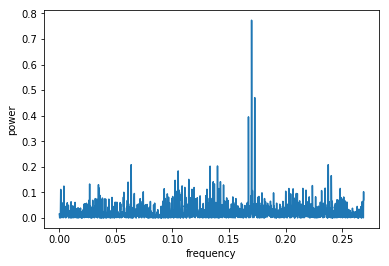

[ 5.88335786] d
17


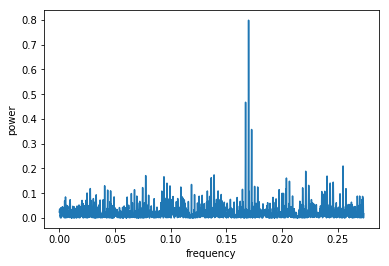

[ 5.88226795] d
17


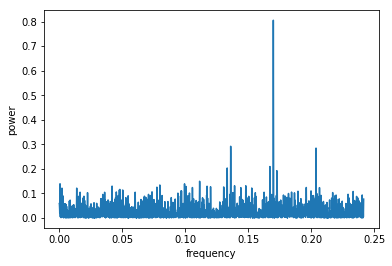

[ 5.88216506] d
17


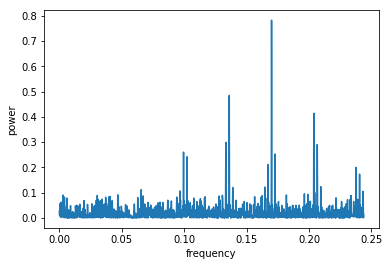

[ 5.88145775] d
17


[ 5.55490519] d
18


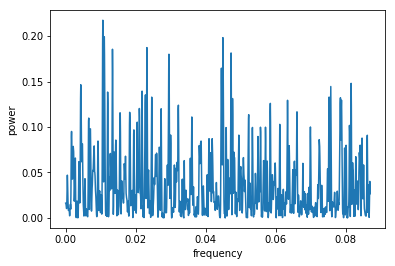

[ 93.99593499] d
18


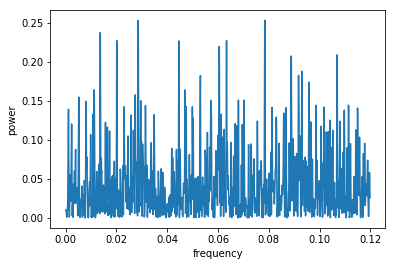

[ 12.74626428] d
18


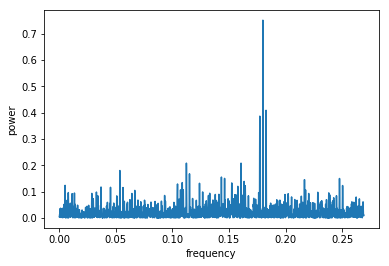

[ 5.5562405] d
18


[ 5.55574205] d
18


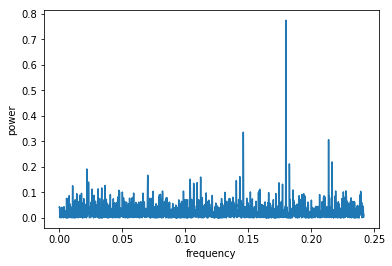

[ 5.55490519] d
18


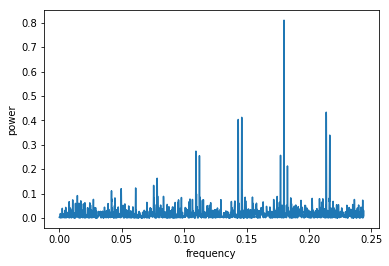

[ 5.5551871] d
18


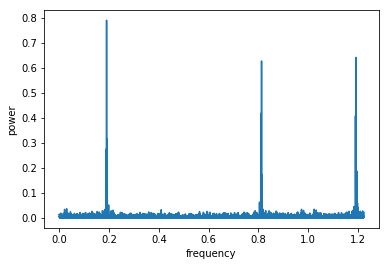

[ 5.26374453] d
19


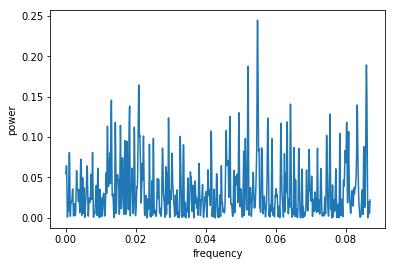

[ 18.24415359] d
19


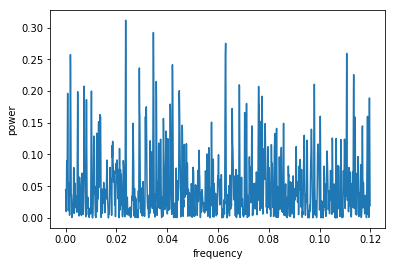

[ 42.27222135] d
19


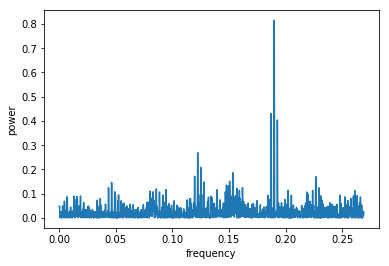

[ 5.26358291] d
19


[ 5.26356072] d
19


[ 5.26374453] d
19


[ 5.26321323] d
19


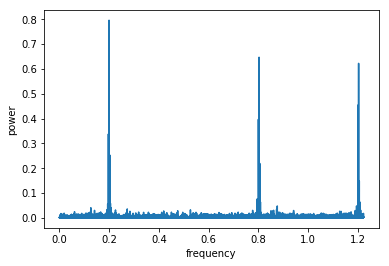

[ 5.00013828] d
20


[ 16.12786705] d
20


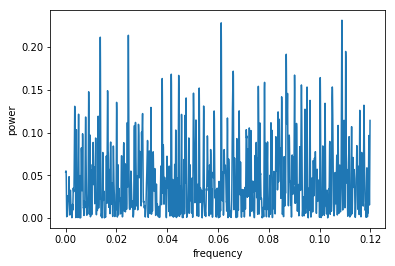

[ 9.1906012] d
20


[ 5.00021236] d
20


[ 5.00057606] d
20


[ 5.00013828] d
20


[ 5.00039837] d
20


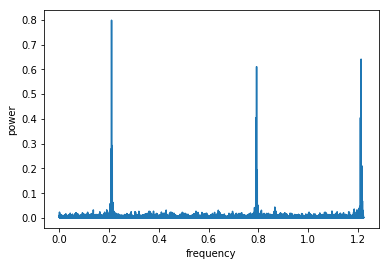

[ 4.76167545] d
21


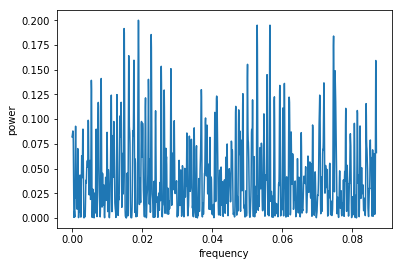

[ 52.71493984] d
21


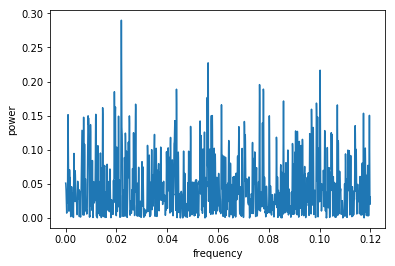

[ 45.5369202] d
21


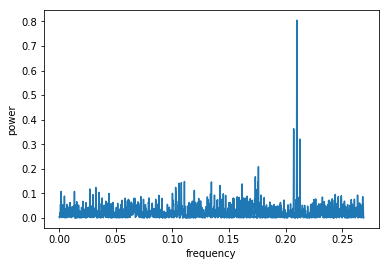

[ 4.76194209] d
21


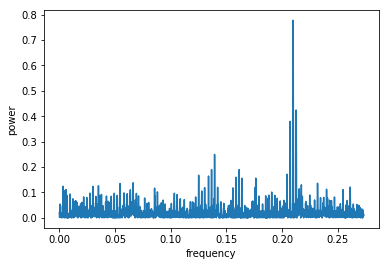

[ 4.76128726] d
21


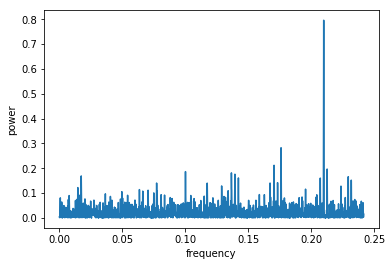

[ 4.76167545] d
21


[ 4.76125795] d
21


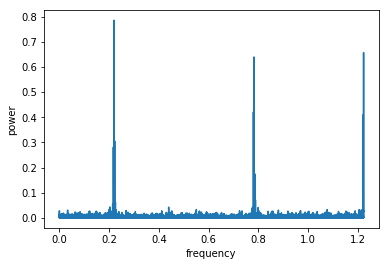

[ 4.54492243] d
22


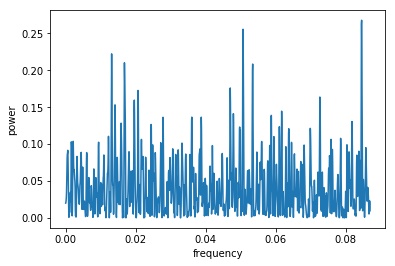

[ 11.82862705] d
22


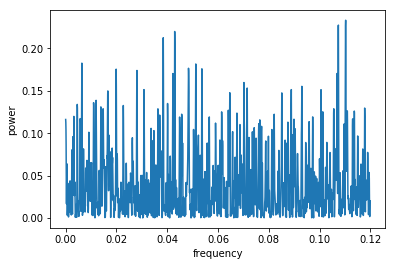

[ 9.06874226] d
22


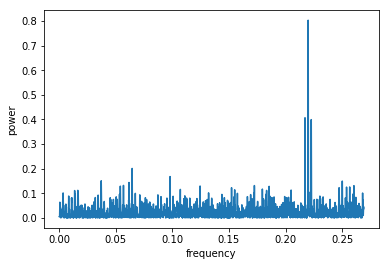

[ 4.54534708] d
22


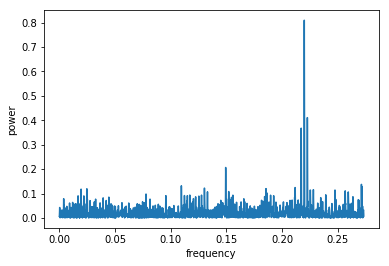

[ 4.54506746] d
22


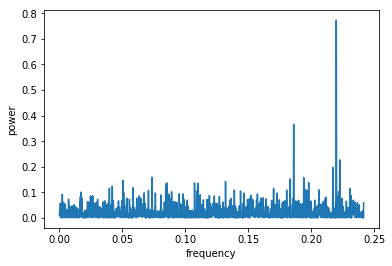

[ 4.54611862] d
22


[ 4.54515308] d
22


[ 4.34813787] d
23


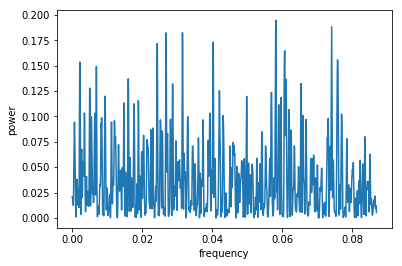

[ 17.17372976] d
23


[ 13.45857028] d
23


[ 4.34759833] d
23


[ 4.34763256] d
23


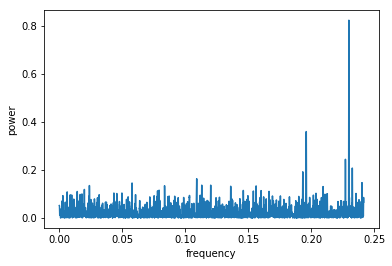

[ 4.34813787] d
23


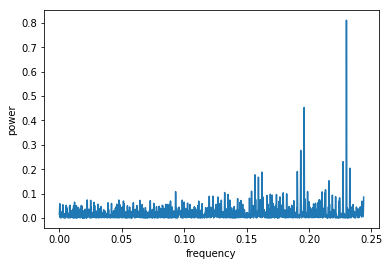

[ 4.34781369] d
23


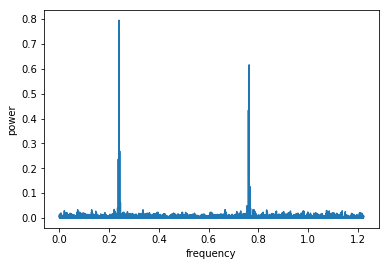

[ 4.16668139] d
24


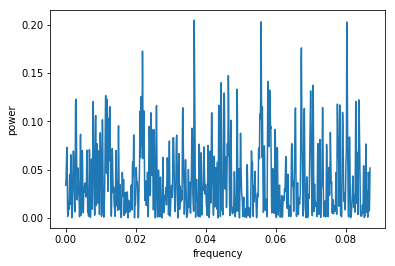

[ 27.2396383] d
24


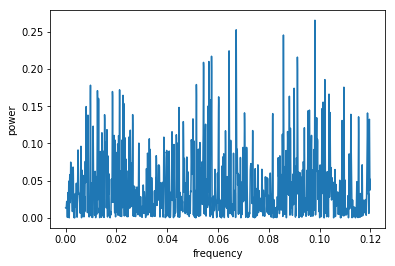

[ 10.18713943] d
24


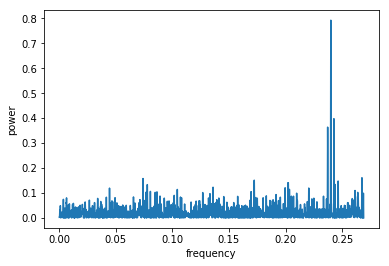

[ 4.16633862] d
24


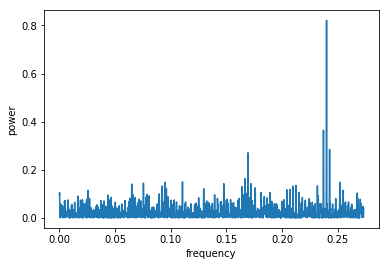

[ 4.16663647] d
24


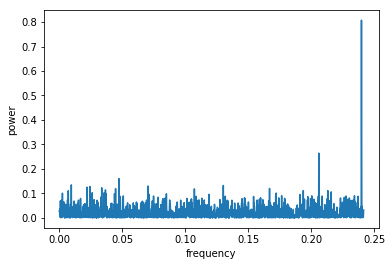

[ 4.16668139] d
24


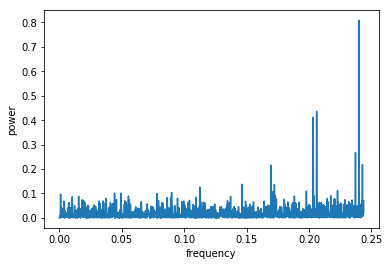

[ 4.16689725] d
24


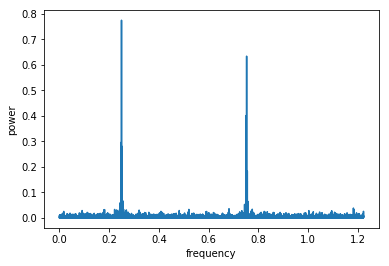

[ 3.99976327] d
25


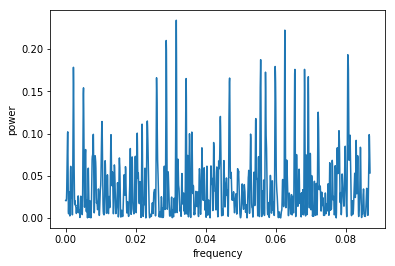

[ 31.62896391] d
25


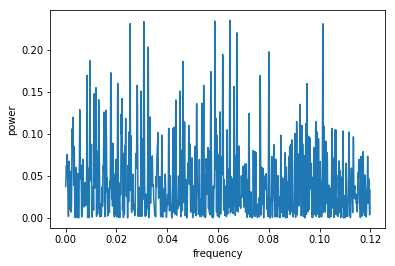

[ 15.46731211] d
25


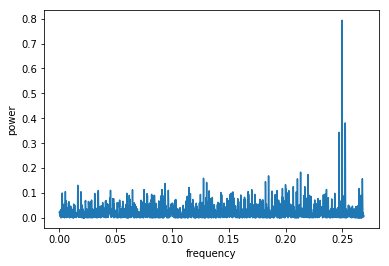

[ 3.99958813] d
25


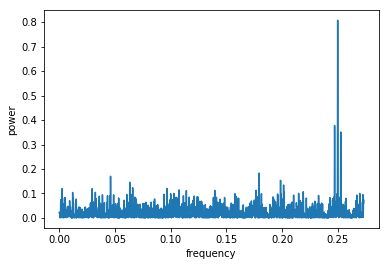

[ 4.00010816] d
25


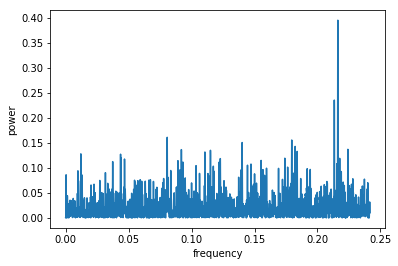

[ 4.62648391] d
25


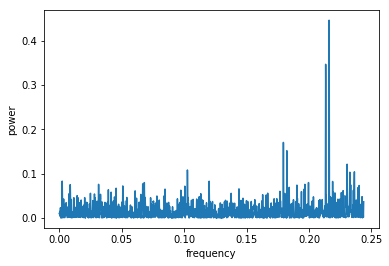

[ 4.62744608] d
25


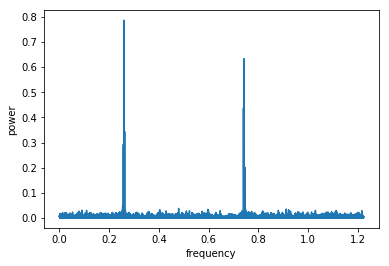

[ 3.84656] d
26


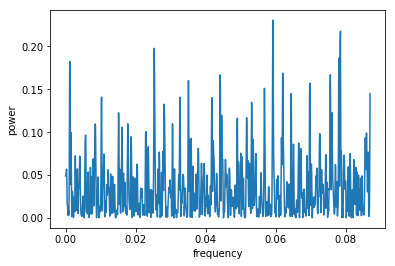

[ 16.89547186] d
26


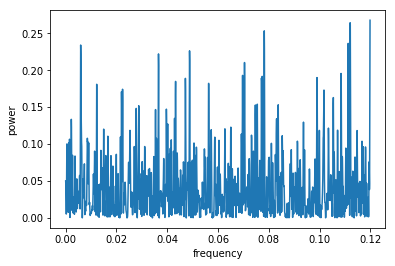

[ 8.34306589] d
26


[ 3.84653239] d
26


[ 3.84637957] d
26


[ 4.42159931] d
26


[ 4.42191458] d
26


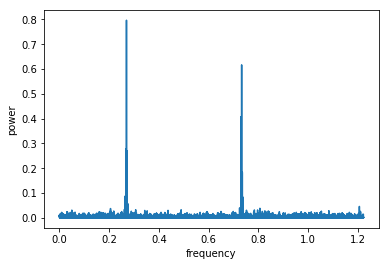

[ 3.7038657] d
27


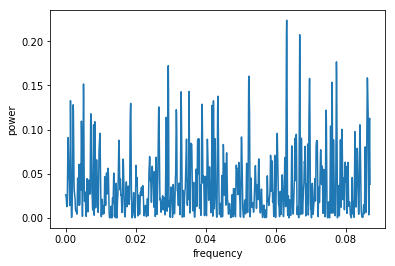

[ 15.83699901] d
27


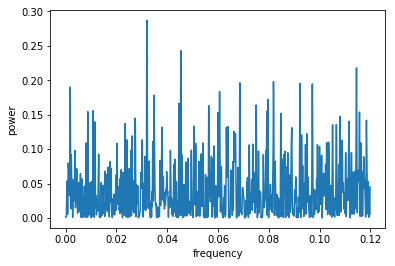

[ 31.2312576] d
27


[ 3.74185915] d
27


[ 3.70402962] d
27


[ 4.23513] d
27


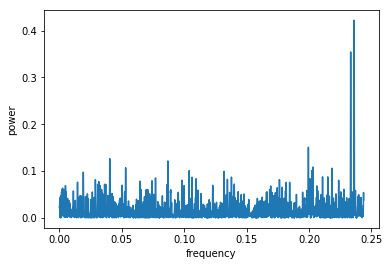

[ 4.2349114] d
27


[ 3.57137965] d
28


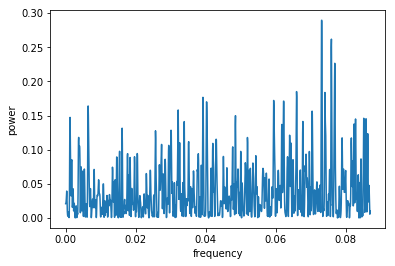

[ 13.67003561] d
28


[ 17.19367877] d
28


[ 4.70845911] d
28


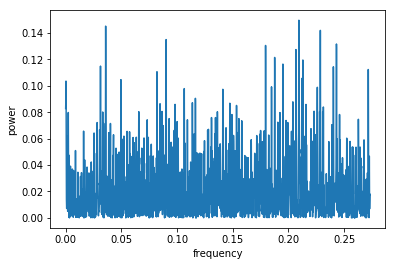

[ 4.77464853] d
28


[ 23.54870851] d
28


[ 4.10890563] d
28


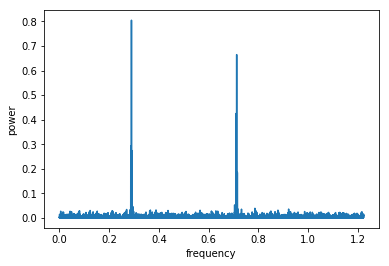

[ 3.44804425] d
29


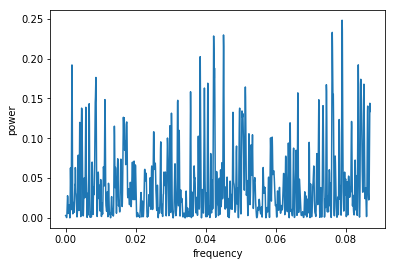

[ 12.66358896] d
29


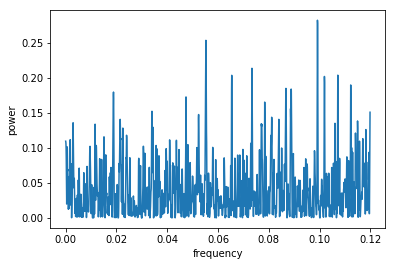

[ 10.08499766] d
29


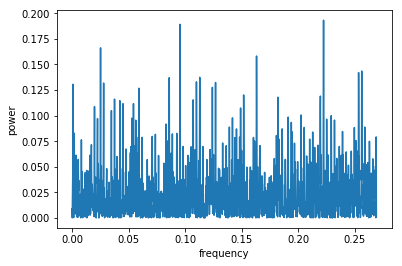

[ 4.49777051] d
29


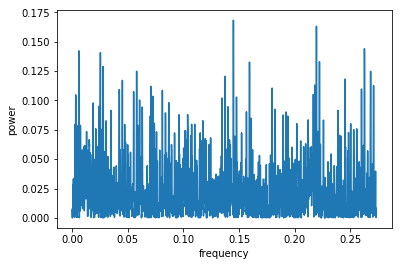

[ 6.90101807] d
29


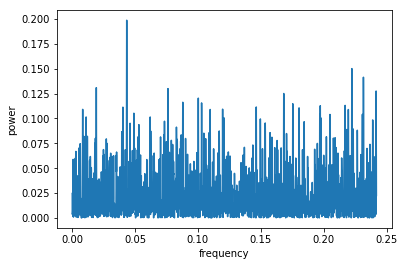

[ 23.01529339] d
29


[ 4.49976724] d
29


In [97]:
def lombScargle():
    actualperiod = []
    measuredperiod = []
    measuredpower = []
    for frange in range(10, 30):    
        allobsy=[]
        uobsy=[]
        gobsy=[]
        robsy=[]
        iobsy=[]
        zobsy=[]
        yobsy=[]
        y = [allobsy, uobsy, gobsy, robsy, iobsy, zobsy, yobsy]
        for z in range(0, len(y)):
            #y[z] = [np.sin((5/(1+(frange/2)))*(x-obs[z][0])) + (np.sin((5/(1+(frange/2)))*(x-obs[z][0]))*random.gauss(0, 0.5)) for x in obs[z]] # optical modulation
            y[z] = averageFlux(obs[z], obs[z][0], frange)
            #print(len(y[z]))

        for z in range(0, len(y)):
            date = [x - obs[z][0] for x in obs[z]]
            date = date * u.day
            amplitude = [0.1 * t for t in y[z]]
            frequency, power = LombScargle(date, amplitude).autopower()
            plt.plot(frequency, power)  
            plt.xlabel('frequency')
            plt.ylabel('power')
            plt.show()
            #print(1/frequency)
            #print(power.max())
            maxpos = [i for i, j in enumerate(power) if j == power.max()]
            period = (1/frequency[maxpos])
            print(period)
            print(frange)

        actualperiod.append(1/(frange*0.01))
        measuredperiod.append(period)
        measuredpower.append(power.max())

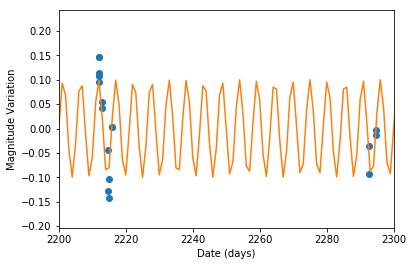

In [68]:
perfex = np.linspace(0, 3500, 3501)
perfect = [0.1*np.sin((2*np.pi*(frange*0.01))*(x)) for x in perfex]

plt.plot(date, amplitude, 'o')
plt.plot(perfex, perfect)
plt.ylabel('Magnitude Variation')
plt.xlabel('Date (days)')
plt.xlim([2200, 2300])
plt.show()

In [84]:
period = 1/(frange*0.01)
phase = [(day.value % period)/period for day in date]
plt.plot(phase, amplitude, 'o')
plt.show()

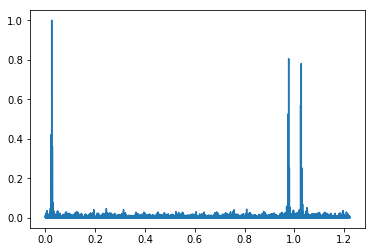

[  3.45459573e+04   1.15153191e+04   6.90919147e+03 ...,   8.17752571e-01
   8.17713858e-01   8.17675148e-01] d
0.99988989123276
[ 6.28361129] d


[  3.33685589e+04   1.11228530e+04   6.67371178e+03 ...,   1.15183151e+01
   1.15103687e+01   1.15024333e+01] d
0.9977808714566169
[ 6.2849362] d


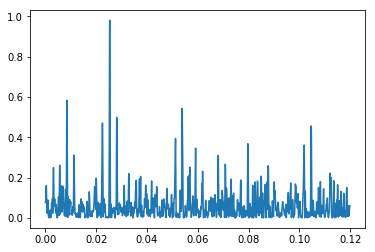

[  3.41982290e+04   1.13994097e+04   6.83964581e+03 ...,   8.35121588e+00
   8.34713914e+00   8.34306637e+00] d
0.9805394566937586
[ 6.27775917] d


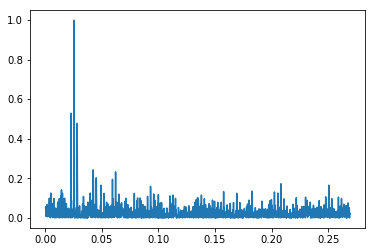

[  3.43764619e+04   1.14588206e+04   6.87529239e+03 ...,   3.71757997e+00
   3.71677608e+00   3.71597254e+00] d
0.9984392749934087
[ 6.28149695] d


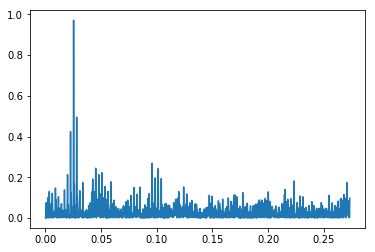

[  3.40289220e+04   1.13429740e+04   6.80578441e+03 ...,   3.66020459e+00
   3.65941736e+00   3.65863047e+00] d
0.97139538396699
[ 6.2902104] d


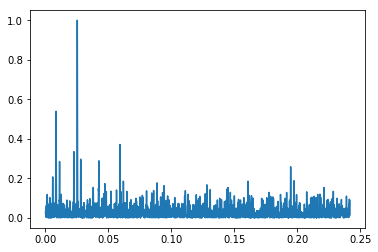

[  3.45459573e+04   1.15153191e+04   6.90919147e+03 ...,   4.13971927e+00
   4.13872737e+00   4.13773594e+00] d
0.9998818930049358
[ 6.28361129] d


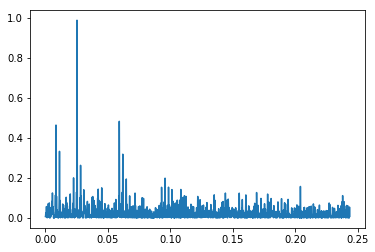

[  3.42477304e+04   1.14159101e+04   6.84954609e+03 ...,   4.10398208e+00
   4.10299873e+00   4.10201586e+00] d
0.9873813017920396
[ 6.28684612] d


In [76]:
for z in range(0, len(y)):
    x = [x - obs[z][0] for x in obs[z]]
    x = x * u.day
    amplitude = [0.1 * x for x in y[z]]
    frequency, power = LombScargle(x, amplitude).autopower()
    plt.plot(frequency, power) 
    plt.xlabel('frequency')
    plt.ylabel('power')
    plt.show()
    print(1/frequency)
    print(power.max())
    maxpos = [i for i, j in enumerate(power) if j == power.max()]
    period = (1/frequency[maxpos])/(2*np.pi)
    print(period)

In [90]:
for s in range(0, len(y)):
    print(len(y[s]))

1690
116
164
370
372
334
334


In [92]:
for prange in range(0, 30): 
    for z in range(0, len(y)):
        print(5/(1+(prange/2)))


5.0
5.0
5.0
5.0
5.0
5.0
5.0
3.3333333333333335
3.3333333333333335
3.3333333333333335
3.3333333333333335
3.3333333333333335
3.3333333333333335
3.3333333333333335
2.5
2.5
2.5
2.5
2.5
2.5
2.5
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.6666666666666667
1.6666666666666667
1.6666666666666667
1.6666666666666667
1.6666666666666667
1.6666666666666667
1.6666666666666667
1.4285714285714286
1.4285714285714286
1.4285714285714286
1.4285714285714286
1.4285714285714286
1.4285714285714286
1.4285714285714286
1.25
1.25
1.25
1.25
1.25
1.25
1.25
1.1111111111111112
1.1111111111111112
1.1111111111111112
1.1111111111111112
1.1111111111111112
1.1111111111111112
1.1111111111111112
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.7692307692307693
0.7692307692307693
0.769230769230769

In [98]:
print(actualperiod)

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8999999999999999, 1.0, 1.1, 1.2, 1.2999999999999998, 1.4, 1.5, 1.6, 1.7, 1.7999999999999998, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4, 2.5, 2.5999999999999996, 2.7, 2.8, 2.9, 3.0, 3.1]


In [99]:
print(measuredperiod)

[<Quantity [ 0.76889485] d>, <Quantity [ 1.41392882] d>, <Quantity [ 0.68588091] d>, <Quantity [ 1.04439463] d>, <Quantity [ 0.68778493] d>, <Quantity [ 0.69997375] d>, <Quantity [ 0.80004339] d>, <Quantity [ 0.89990021] d>, <Quantity [ 0.99994415] d>, <Quantity [ 1.10003947] d>, <Quantity [ 1.19980092] d>, <Quantity [ 1.29995125] d>, <Quantity [ 1.4001273] d>, <Quantity [ 1.50032909] d>, <Quantity [ 1.59985195] d>, <Quantity [ 1.69962444] d>, <Quantity [ 1.79950333] d>, <Quantity [ 1.89985904] d>, <Quantity [ 2.00025526] d>, <Quantity [ 2.10046073] d>, <Quantity [ 2.20052305] d>, <Quantity [ 2.30084238] d>, <Quantity [ 2.40013016] d>, <Quantity [ 2.49917267] d>, <Quantity [ 2.59928259] d>, <Quantity [ 2.69970064] d>, <Quantity [ 2.79953548] d>, <Quantity [ 2.90084917] d>, <Quantity [ 2.99983246] d>, <Quantity [ 3.09874678] d>]


In [100]:
print(measuredpower)

[<Quantity 0.7671181677413504>, <Quantity 0.09751331547029266>, <Quantity 0.12971509783461657>, <Quantity 0.19146405430659003>, <Quantity 0.6339742308105404>, <Quantity 1.0099657229998558>, <Quantity 1.0022059418058062>, <Quantity 0.9906201670564352>, <Quantity 1.0003109114561581>, <Quantity 1.0008673895626583>, <Quantity 0.979272987675998>, <Quantity 1.0004166525884999>, <Quantity 0.9972560401446665>, <Quantity 0.9772143534790233>, <Quantity 0.996160010838558>, <Quantity 0.9829877288261165>, <Quantity 0.9752227714900357>, <Quantity 0.998768139212023>, <Quantity 0.9948896040517605>, <Quantity 0.9906234940134563>, <Quantity 0.9857426758878322>, <Quantity 0.9752068208914756>, <Quantity 0.9994454382174683>, <Quantity 0.9750877749302662>, <Quantity 0.9890125125194142>, <Quantity 0.998518293200765>, <Quantity 0.9964610868249435>, <Quantity 0.9859312077219116>, <Quantity 0.9996137172330916>, <Quantity 0.9812970784740546>]


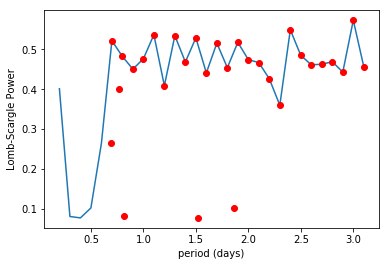

In [117]:
plt.plot(actualperiod, measuredpower)
plt.plot(measuredperiod, measuredpower, 'ro')
plt.xlabel('period (days)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

In [28]:
for prange in range(0, 30):
    print(1/(5/((prange/2)+1)))
    print()

0
0
0
0
1
1
1
1
1
1


ZeroDivisionError: integer division or modulo by zero